In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv("C:/Users/HP/Downloads/diabetes.csv")
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [5]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = 'Diabetic'
x = diabetes[features].values
y = diabetes[label].values

for n in range(0, 4):
    print("Patient", str(n + 1), "\n Features:",list(x[n]), "\n Label:", y[n])

Patient 1 
 Features: [np.float64(0.0), np.float64(171.0), np.float64(80.0), np.float64(34.0), np.float64(23.0), np.float64(43.50972593), np.float64(1.213191354), np.float64(21.0)] 
 Label: 0
Patient 2 
 Features: [np.float64(8.0), np.float64(92.0), np.float64(93.0), np.float64(47.0), np.float64(36.0), np.float64(21.24057571), np.float64(0.158364981), np.float64(23.0)] 
 Label: 0
Patient 3 
 Features: [np.float64(7.0), np.float64(115.0), np.float64(47.0), np.float64(52.0), np.float64(35.0), np.float64(41.51152348), np.float64(0.079018568), np.float64(23.0)] 
 Label: 0
Patient 4 
 Features: [np.float64(9.0), np.float64(103.0), np.float64(78.0), np.float64(25.0), np.float64(304.0), np.float64(29.58219193), np.float64(1.282869847), np.float64(43.0)] 
 Label: 1


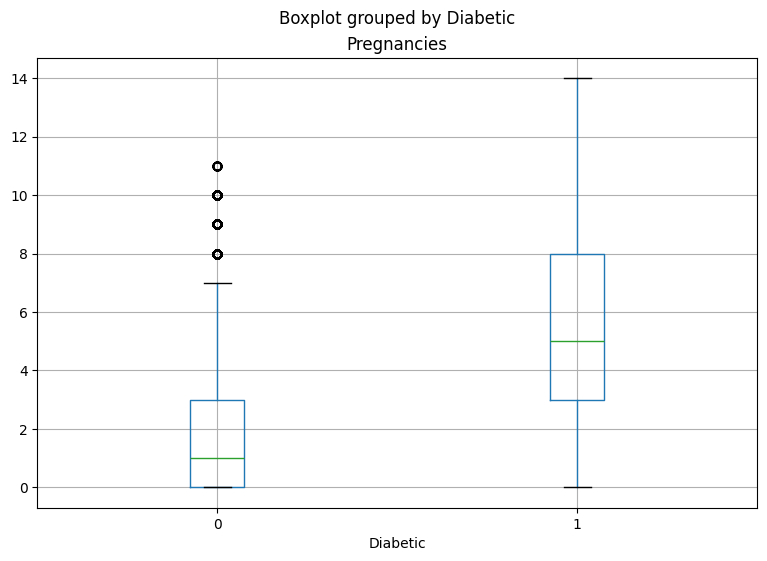

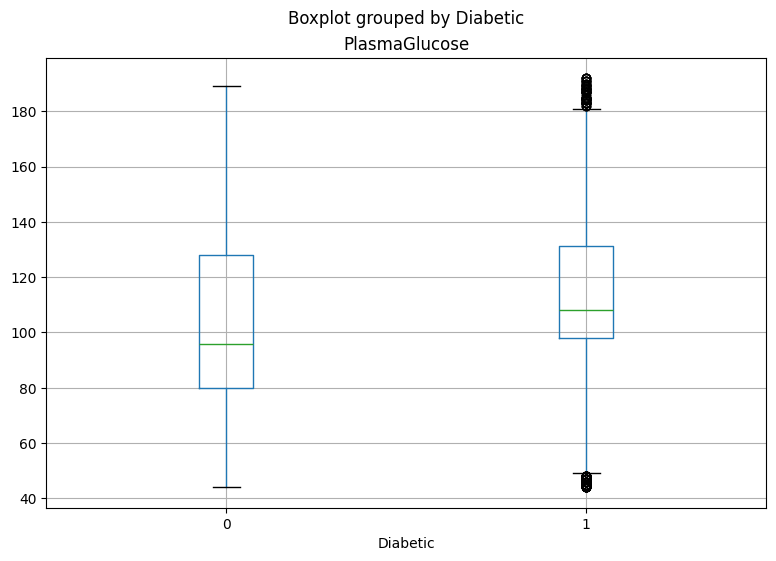

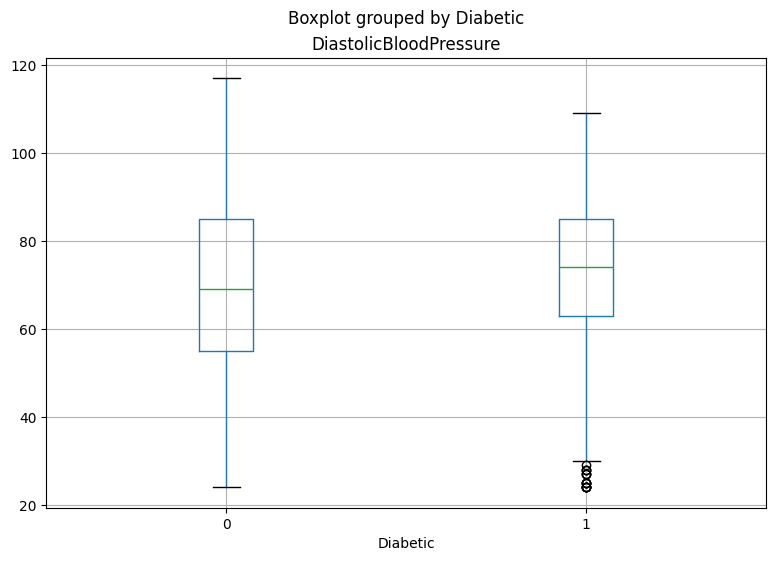

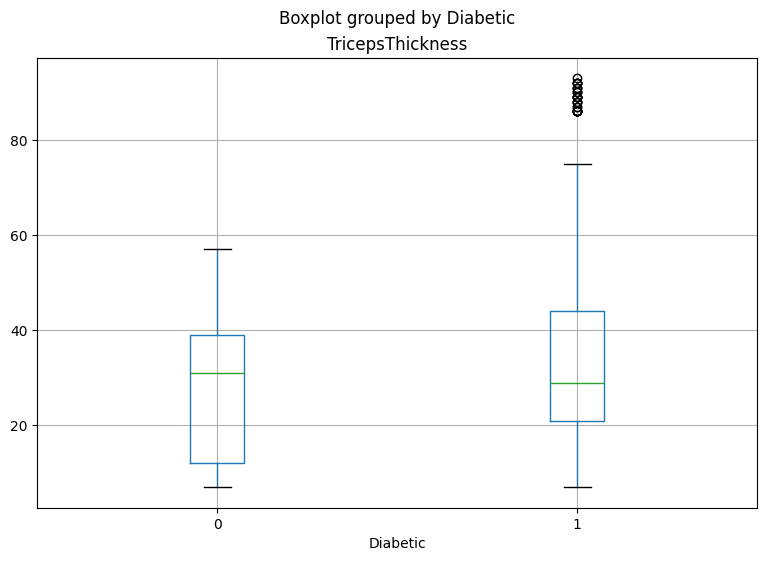

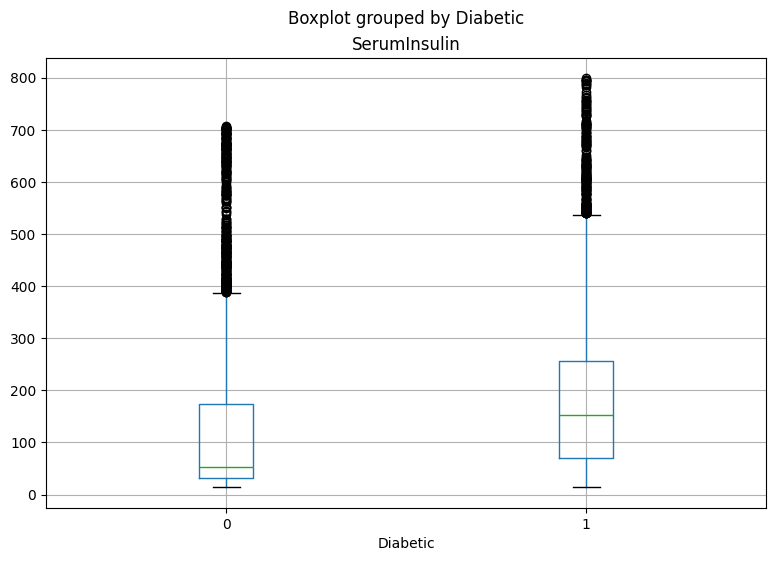

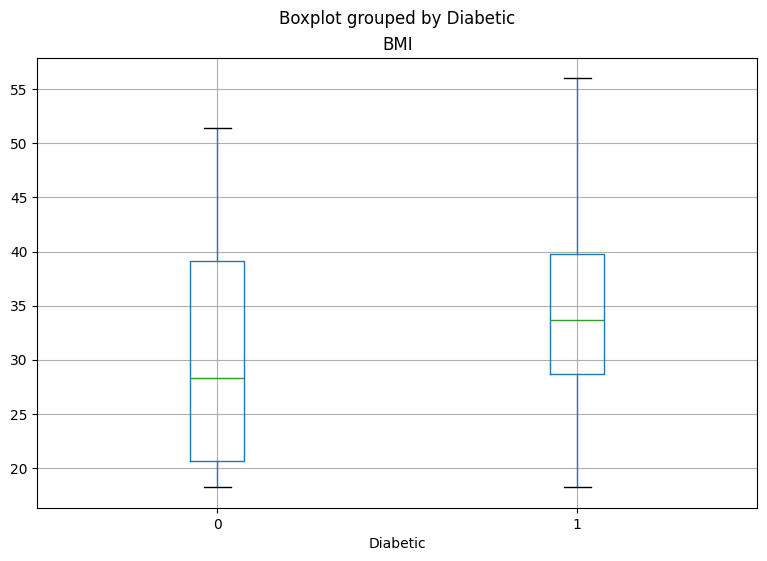

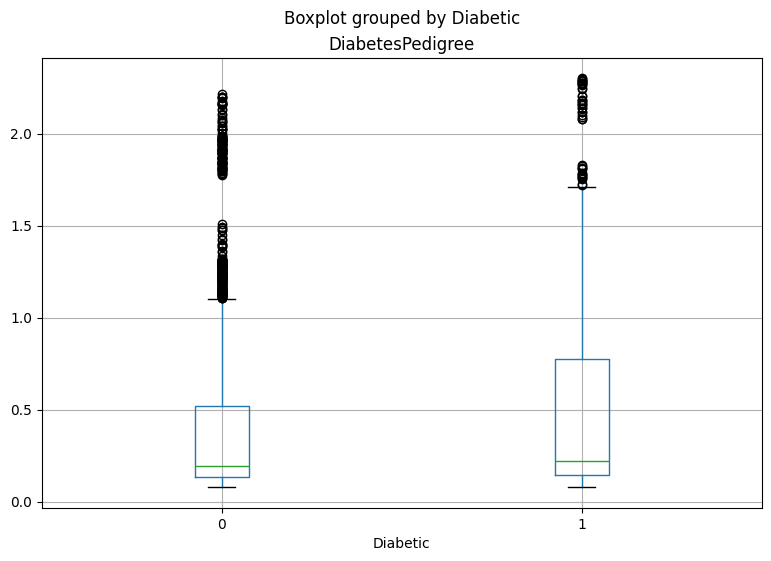

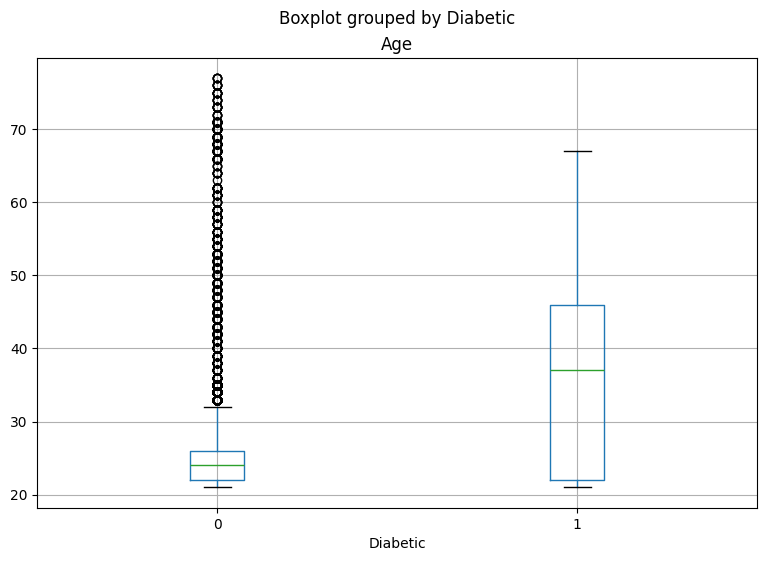

In [6]:
for col in features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    diabetes.boxplot(column=col, by='Diabetic', ax=ax)

plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 10500
Test cases: 4500


In [10]:
from sklearn.linear_model import LogisticRegression
# set regularization rate
reg = 0.01
model = LogisticRegression(C=1/reg, solver="liblinear").fit(x_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [11]:
prediction = model.predict(x_test)
print('Predicted label:', prediction)
print('Actual label:', y_test)

Predicted label: [0 0 0 ... 0 1 0]
Actual label: [0 0 1 ... 1 1 1]


In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy score:', accuracy_score(y_test, prediction))

Accuracy score: 0.7893333333333333


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [14]:
from sklearn.metrics import precision_score, recall_score
print('Overall Precision:', precision_score(y_test, prediction))
print('Overall recall:', recall_score(y_test, prediction))

Overall Precision: 0.7242472266244057
Overall recall: 0.6036988110964333


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[2638  348]
 [ 600  914]]


In [16]:
y_scores = model.predict_proba(x_test)
print(y_scores)

[[0.81651727 0.18348273]
 [0.96298333 0.03701667]
 [0.80862083 0.19137917]
 ...
 [0.60688422 0.39311578]
 [0.10672996 0.89327004]
 [0.63865894 0.36134106]]


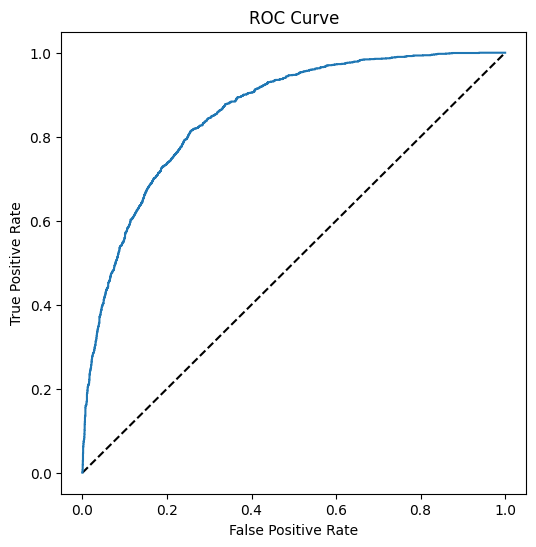

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
fig = plt.figure(figsize=(6, 6))
# plot the diagonal 50% line
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_scores[:, 1])
print('AUC: ' + str(auc))

AUC: 0.8568482508863468


In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

numeric_features = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [7]
categorical_transformer = Pipeline(steps=[('Onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('Regressor', LogisticRegression(C=1/reg, solver='liblinear'))])
model = pipeline.fit(x_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('Onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('Regressor', LogisticRegression(C=100.0, solver='liblinear'))])


Confusion matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall recall: 0.7318361955085865
AUC: 0.9202444963329531


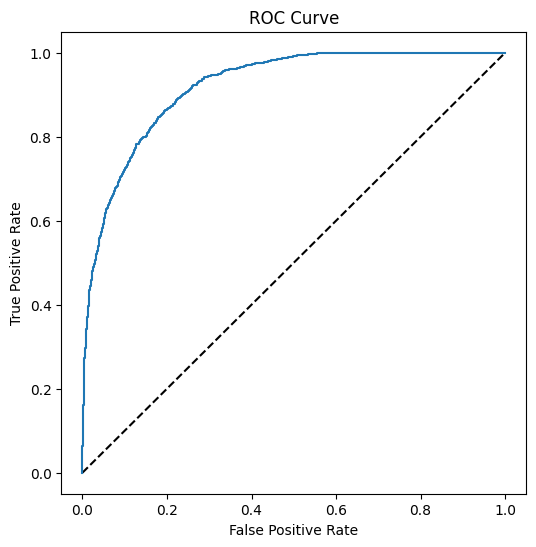

In [20]:
prediction = model.predict(x_test)
y_scores = model.predict_proba(x_test)
cm = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, prediction))
print('Overall Precision:', precision_score(y_test, prediction))
print('Overall recall:', recall_score(y_test, prediction))
auc = roc_auc_score(y_test, y_scores[:, 1])
print('AUC: ' + str(auc))
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
fig = plt.figure(figsize=(6, 6))
# plot the diagonal 50% line
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier(n_estimators=100))])
model = pipeline.fit(x_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('Onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('regressor', RandomForestClassifier())])


Confusion matrix:
 [[2862  124]
 [ 190 1324]] 

Accuracy: 0.9302222222222222
Overall Precision: 0.914364640883978
Overall recall: 0.8745046235138706
AUC: 0.9814364878459672


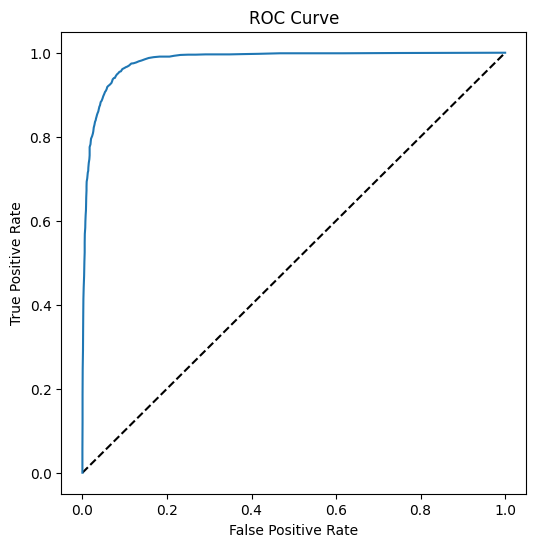

In [23]:
prediction = model.predict(x_test)
y_scores = model.predict_proba(x_test)
cm = confusion_matrix(y_test, prediction)
print('Confusion matrix:\n', cm, '\n')
print('Accuracy:', accuracy_score(y_test, prediction))
print('Overall Precision:', precision_score(y_test, prediction))
print('Overall recall:', recall_score(y_test, prediction))
auc = roc_auc_score(y_test, y_scores[:, 1])
print('AUC: ' + str(auc))
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
fig = plt.figure(figsize=(6, 6))
# plot the diagonal 50% line
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [24]:
import joblib
filename = "C:/Users/HP/Downloads/diabetes.pkl"
joblib.dump(model, filename)

['C:/Users/HP/Downloads/diabetes.pkl']

In [27]:
model = joblib.load(filename)
x_new = np.array([[2, 180, 74, 24, 21, 23.9091702, 1.488172308, 22]])
print('New sample: {}'. format(list(x_new[0])))
pred = model.predict(x_new)
print('Predicted class is {}'.format(pred[0]))

New sample: [np.float64(2.0), np.float64(180.0), np.float64(74.0), np.float64(24.0), np.float64(21.0), np.float64(23.9091702), np.float64(1.488172308), np.float64(22.0)]
Predicted class is 1
